In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
# CHANGE NEXT LINE
# output_folder_location: str = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-20-2024-lbl-all-lines-good" # CHANGE
output_folder_location =  "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-30-2024-14-57-49_allCN_vmic_4.0"
# loads all data from config file and output, config is copied into output folder with name "configuration.txt" from now on
config_dict = load_output_data(output_folder_location)

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../scripts/loading_configs.py:15: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(input_file_path, index_col=False, comment=';', sep='\s+')


ValueError: The configuration file /media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-30-2024-14-57-49_allCN_vmic_4.0/configuration.cfg does not exist.

In [24]:
output_results_pd_df = config_dict["output_file_df"]   # Pandas dataframe for your own use

In [51]:
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed.reset_index(drop=True)
output_trimmed = output_trimmed.sort_values(by='wave_center')
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]

output_trimmed2 = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]

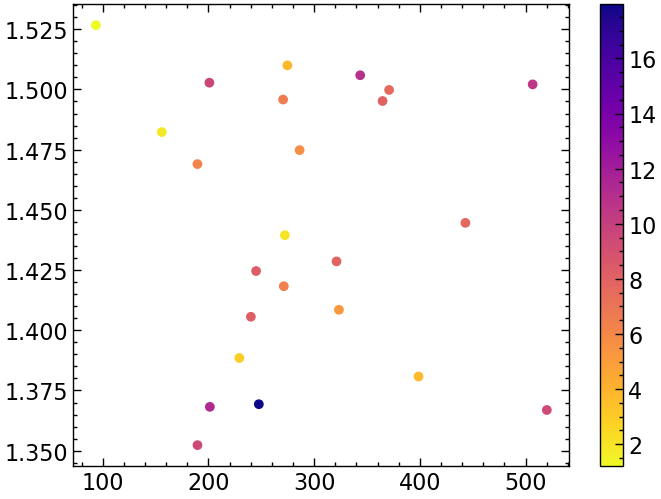

In [52]:

ews = output_trimmed2["ew"]
nfes = output_trimmed2["N_Fe"]
plt.scatter(ews,nfes, c = output_trimmed2["chi_squared"], cmap = "plasma_r")
plt.colorbar()

In [53]:
paths = ["/media/advait/DATA/research/rcb-project/TSFitPy/output_files/allCN_vmic_{}.0".format(n) for n in range(3,8)]
vmics = [3,4,5,6,7]
cs = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'D', '^', 'v']

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')
/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')
/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')
/media/advait/DATA/resear

3 0.00040972080342833187
4 0.00029204409714175984
5 0.00014934122447116474
6 4.0366101392411536e-05
7 -2.8914314816845676e-05


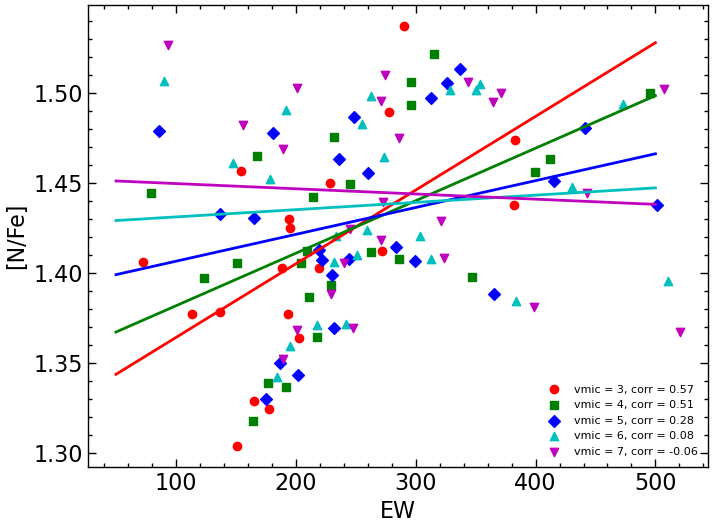

In [54]:
for i in range(len(paths)):
    config_dict = load_output_data(paths[i])
    output_results_pd_df = config_dict["output_file_df"]   # Pandas dataframe for your own use
    output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
    output_trimmed = output_trimmed.reset_index(drop=True)
    output_trimmed = output_trimmed.sort_values(by='wave_center')
    output_trimmed2 = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]
    ews = output_trimmed2["ew"]
    nfes = output_trimmed2["N_Fe"]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(50, 500, 100)
    y = m*x + c
    print(vmics[i], m)
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")
    # plt.title("vmic = {}".format(vmics[i]))
    # plt.show()

In [50]:
output_trimmed2

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22598.75,22597.50,22600.0,-2.5000,0.0,1.4958,7.0,1.0,0.0,6.590539,270.6949,0,10000000
2,HD137613.txt,22617.20,22616.40,22618.0,-1.4977,0.0,1.3693,7.0,1.0,0.0,17.970475,247.7309,0,0
5,HD137613.txt,22663.50,22662.00,22665.0,-1.8815,0.0,1.4183,7.0,1.0,0.0,6.324261,271.3484,0,0
6,HD137613.txt,22673.40,22672.00,22674.8,-1.3351,0.0,1.4952,7.0,1.0,0.0,8.029015,364.7807,0,0
7,HD137613.txt,22676.40,22675.00,22677.8,-0.9075,0.0,1.4748,7.0,1.0,0.0,5.717299,286.3080,0,0
12,HD137613.txt,22718.90,22717.50,22720.3,-0.9350,0.0,1.5059,7.0,1.0,0.0,10.859363,343.6363,0,0
13,HD137613.txt,22728.25,22727.00,22729.5,-1.8938,0.0,1.4085,7.0,1.0,0.0,5.239769,323.5203,0,0
14,HD137613.txt,22730.40,22729.30,22731.5,-1.9011,0.0,1.4246,7.0,1.0,0.0,8.302343,245.1390,0,0
15,HD137613.txt,22732.25,22731.50,22733.0,-1.8519,0.0,1.5267,7.0,1.0,0.0,1.203901,93.6041,0,0
16,HD137613.txt,22743.50,22742.00,22745.0,-0.8005,0.0,1.4998,7.0,1.0,0.0,7.662994,370.9561,0,0


In [22]:
paths = ["/media/advait/DATA/research/rcb-project/TSFitPy/output_files/allCN_vmic_{}_vmac0".format(n) for n in [5.0,6.0,6.5, 7.0, 8.0]]
vmics = [5,6,6.5, 7, 8]
cs = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'D', '^', 'v']
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')
/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')
/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')
/media/advait/DATA/resear

5 0.00014914180996629392
6 4.1247606228104114e-05
6.5 3.6032217496012482e-06
7 -2.81447679172297e-05


/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


8 -0.00017611579513331218


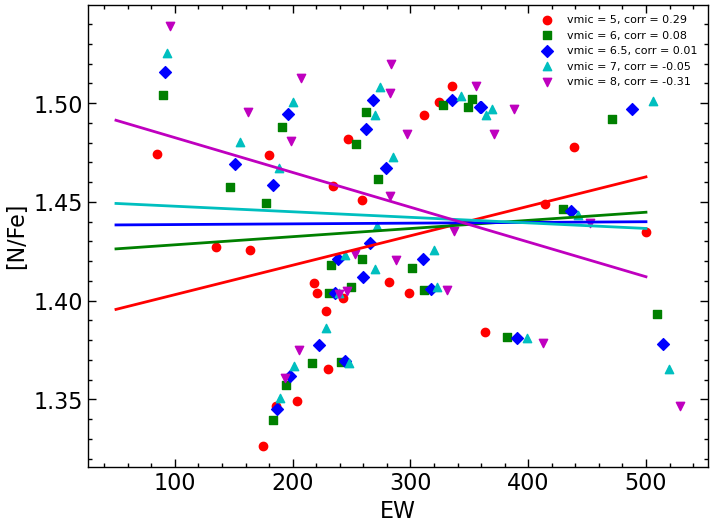

In [23]:
for i in range(len(paths)):
    config_dict = load_output_data(paths[i])
    output_results_pd_df = config_dict["output_file_df"]   # Pandas dataframe for your own use
    output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
    output_trimmed = output_trimmed.reset_index(drop=True)
    output_trimmed = output_trimmed.sort_values(by='wave_center')
    output_trimmed2 = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]
    ews = output_trimmed2["ew"]
    nfes = output_trimmed2["N_Fe"]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(50, 500, 100)
    y = m*x + c
    print(vmics[i], m)
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")
    # plt.title("vmic = {}".format(vmics[i]))
    # plt.show()

In [34]:
len(output_trimmed2)

22